In [1]:
# conda install -c conda-forge nltk

#!pip install pyspellchecker

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import textwrap
import re
import string
import collections

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("viridis")
sns.set_style("white")
sns.set_context("paper", font_scale=1.35)

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker

# Exploratory Data Analysis

In [2]:
noise = pd.read_csv('Reviews_Noise.csv')
boat = pd.read_csv('Reviews_boAt.csv')
fireboltt = pd.read_csv('Reviews_FireBoltt.csv')

In [3]:
df = pd.concat([noise,boat,fireboltt])

In [4]:
df.shape

(14823, 8)

In [5]:
df.head(3)

,Unnamed: 0,Brand,Model_no,Model_name,Reviewer,City,Rating,Review
0,0,Noise,wrb-sw-colorfitqubeoxy-std-blk_blk,ColorFit Qube SpO2,Akanksha Singh,Allahabad,5,This fit band is so good and so adjustable lik...
1,1,Noise,wrb-sw-colorfitqubeoxy-std-blk_blk,ColorFit Qube SpO2,Chandrima Roy,Siliguri,5,Fit is awsum.lukwise it is just gorgeous.N val...
2,2,Noise,wrb-sw-colorfitqubeoxy-std-blk_blk,ColorFit Qube SpO2,Amrin.R.Sk Sk,Mumbai,5,Very nice watch really liked the display & loo...


In [6]:
df = df.iloc[:, 1:]
df['Rating'] = pd.to_numeric(df['Rating'])

In [7]:
df.head(3)

,Brand,Model_no,Model_name,Reviewer,City,Rating,Review
0,Noise,wrb-sw-colorfitqubeoxy-std-blk_blk,ColorFit Qube SpO2,Akanksha Singh,Allahabad,5,This fit band is so good and so adjustable lik...
1,Noise,wrb-sw-colorfitqubeoxy-std-blk_blk,ColorFit Qube SpO2,Chandrima Roy,Siliguri,5,Fit is awsum.lukwise it is just gorgeous.N val...
2,Noise,wrb-sw-colorfitqubeoxy-std-blk_blk,ColorFit Qube SpO2,Amrin.R.Sk Sk,Mumbai,5,Very nice watch really liked the display & loo...


In [8]:
df.columns

Index(['Brand', 'Model_no', 'Model_name', 'Reviewer', 'City', 'Rating',
       'Review'],
      dtype='object')

In [9]:
avg_rating_by_brand = pd.DataFrame(df.groupby(by='Brand')['Rating'].mean()).reset_index()

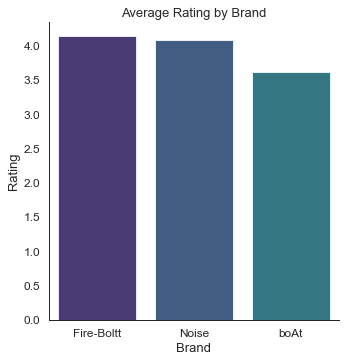

In [10]:
#plt.figure(figsize=(1,1))
sns.catplot(x='Brand', y='Rating', data=avg_rating_by_brand, kind='bar').set(title='Average Rating by Brand')

[Text(0.5, 1.0, 'Fire-Boltt')]

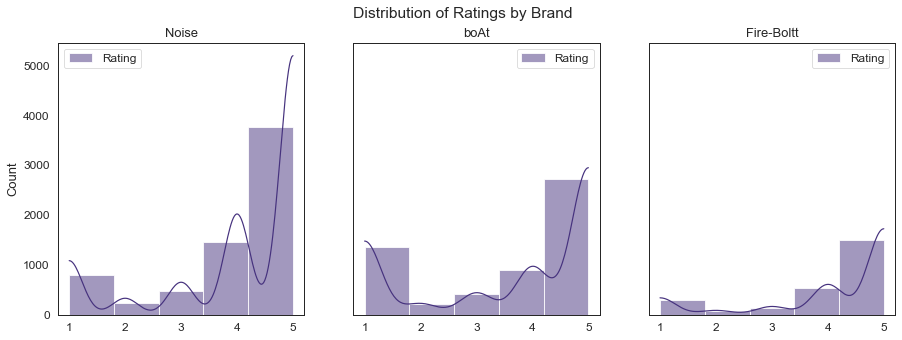

In [11]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
fig.suptitle('Distribution of Ratings by Brand')
sns.histplot(ax=axs[0], data=df[df['Brand']=='Noise'],bins=5, kde=True).set(title='Noise')
sns.histplot(ax=axs[1], data=df[df['Brand']=='boAt'], bins=5, kde=True).set(title='boAt')
sns.histplot(ax=axs[2], data=df[df['Brand']=='Fire-Boltt'], bins=5, kde=True).set(title='Fire-Boltt')

In [12]:
avg_rating_by_brand_model = pd.DataFrame(df.groupby(by=['Brand','Model_name'])['Rating'].mean()).reset_index()

In [13]:
n = avg_rating_by_brand_model.loc[avg_rating_by_brand_model['Brand']=='Noise'].sort_values(by='Rating', ascending=False)
b = avg_rating_by_brand_model.loc[avg_rating_by_brand_model['Brand']=='boAt'].sort_values(by='Rating', ascending=False)
f = avg_rating_by_brand_model.loc[avg_rating_by_brand_model['Brand']=='Fire-Boltt'].sort_values(by='Rating', ascending=False)

In [14]:
n

,Brand,Model_name,Rating
5,Noise,ColorFit Brio,4.249119
7,Noise,ColorFit Pro 2,4.201799
6,Noise,ColorFit Caliber,4.191489
12,Noise,Fit Active,4.128554
8,Noise,ColorFit Pro 3,4.116951
11,Noise,Evolve 2 AMOLED with 42mm Dial Size,4.078775
10,Noise,ColorFit Qube SpO2,4.018779
9,Noise,ColorFit Qube,3.901266
13,Noise,Icon Buzz Bluetooth Calling with AI Voice Assi...,3.667763


In [15]:
b

,Brand,Model_name,Rating
22,boAt,Wave Pro 47,4.307692
23,boAt,Wave pro 1.69inch HD display withTemperature S...,4.078431
20,boAt,"Watch Mercury 1.54"" TFTDisplay",4.006873
18,boAt,"Vertex 1.69"" HealthEcosystem",3.942568
19,boAt,"Watch Iris 1.39"" AMOLEDDisplay",3.871508
17,boAt,"Storm 1.3"" IronManEdition",3.493671
15,boAt,"Storm 1.3"" CaptainAmericaEdition",3.458937
16,boAt,"Storm 1.3"" CurvedDisplay",3.356322
14,boAt,"Storm 1.3"" BlackPantherEdition",3.309987
21,boAt,Watch Xplorer O2,3.036000


In [16]:
f

,Brand,Model_name,Rating
2,Fire-Boltt,Ninja Pro Max,4.344291
0,Fire-Boltt,"Almighty, BT Calling, Voice Assistant",4.233945
1,Fire-Boltt,Mercury,4.206444
3,Fire-Boltt,"Ninja Pro Plus 1.69 Display, 30 Sports Mode & ...",3.861538
4,Fire-Boltt,Talk Bluetooth Calling,3.797716


[Text(0, 0, 'ColorFit Brio'),
 Text(0, 1, 'ColorFit Pro 2'),
 Text(0, 2, 'ColorFit Caliber'),
 Text(0, 3, 'Fit Active'),
 Text(0, 4, 'ColorFit Pro 3'),
 Text(0, 5, 'Evolve 2 AMOLED with 42mm Dial\nSize'),
 Text(0, 6, 'ColorFit Qube SpO2'),
 Text(0, 7, 'ColorFit Qube'),
 Text(0, 8, 'Icon Buzz Bluetooth Calling\nwith AI Voice Assistance')]

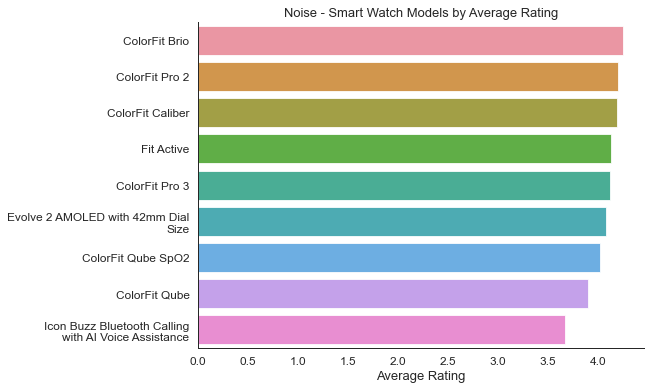

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(y='Model_name', x='Rating', 
            data=n,
           orient='h').set(title='Noise - Smart Watch Models by Average Rating', xlabel='Average Rating', ylabel=None)
sns.despine()
ax.set_yticklabels(textwrap.fill(x.get_text(), 30) for x in ax.get_yticklabels())

[Text(0, 0, 'Wave Pro 47'),
 Text(0, 1, 'Wave pro 1.69inch HD display\nwithTemperature Sensor and\nlive cricket updates'),
 Text(0, 2, 'Watch Mercury 1.54" TFTDisplay'),
 Text(0, 3, 'Vertex 1.69" HealthEcosystem'),
 Text(0, 4, 'Watch Iris 1.39" AMOLEDDisplay'),
 Text(0, 5, 'Storm 1.3" IronManEdition'),
 Text(0, 6, 'Storm 1.3"\nCaptainAmericaEdition'),
 Text(0, 7, 'Storm 1.3" CurvedDisplay'),
 Text(0, 8, 'Storm 1.3" BlackPantherEdition'),
 Text(0, 9, 'Watch Xplorer O2')]

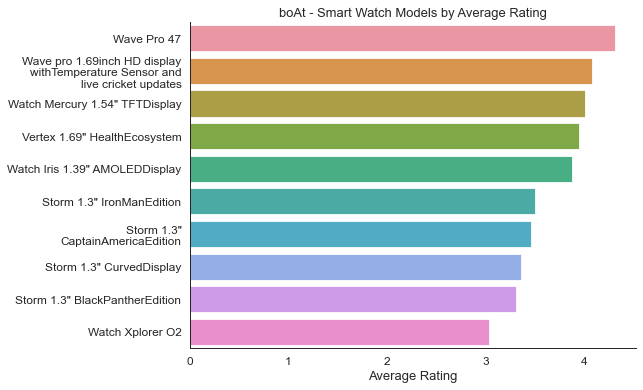

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(y='Model_name', x='Rating', 
            data=b,
           orient='h').set(title='boAt - Smart Watch Models by Average Rating', xlabel='Average Rating', ylabel=None)
sns.despine()
ax.set_yticklabels(textwrap.fill(x.get_text(), 30) for x in ax.get_yticklabels())

[Text(0, 0, 'Ninja Pro Max'),
 Text(0, 1, 'Almighty, BT Calling, Voice\nAssistant'),
 Text(0, 2, 'Mercury'),
 Text(0, 3, 'Ninja Pro Plus 1.69 Display,\n30 Sports Mode & 2ATM Water\nResistance Smartwatch'),
 Text(0, 4, 'Talk Bluetooth Calling')]

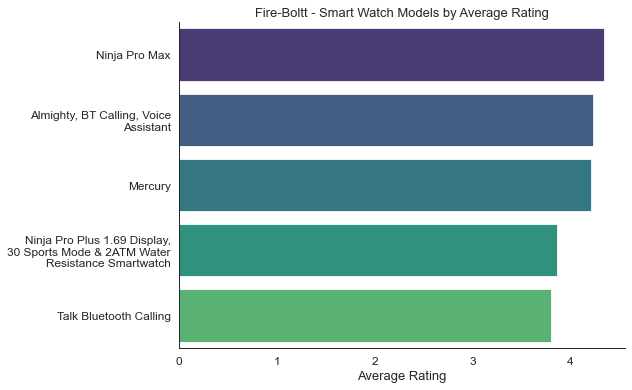

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(y='Model_name', x='Rating', 
            data=f,
           orient='h').set(title='Fire-Boltt - Smart Watch Models by Average Rating', xlabel='Average Rating', ylabel=None)
sns.despine()
ax.set_yticklabels(textwrap.fill(x.get_text(), 30) for x in ax.get_yticklabels())

# Word Cloud

In [20]:
# remove html tags
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

def add_space_after_dot(text):
    res = re.sub('\s+$', '', re.sub('\s+', ' ', re.sub('\.', '. ', text)))
    return res


# remove punctuations
exclude = string.punctuation
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

# remove stopwords
sw = stopwords.words('english')
words_to_remove=['watch','smartwatch','flipkart','noise','boat','using','product','dont','working','really']
for w in words_to_remove:
    sw.append(w)
    
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in sw:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return ' '.join(x)

def remove_stopwords_1(text):
    new_text = []
    sw.append(['good','nice','awsome','amazing','like','love','bad','awesome'])
    for word in text.split():
        if word in sw:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return ' '.join(x)

def isSW(word):
    if word in sw:
        return True
    else:
        return False
    

# remove emojis
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return emoj.sub(r'', text)

# perform tokenization
def tkzn(text):
    return nltk.word_tokenize(text)

# perform lemmatization
def lmtzn(word): 
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

def lm(tokens):
    lemmas = []
    for word in tokens:
        lemmas.append(lmtzn(word))
    return " ".join(lemmas)

# generate word cloud
def generateWC(text):
    word_cloud = WordCloud(collocations = False, 
                       background_color = 'white',
                      width=800,
                      height=600,
                          max_words=100).generate(text)
    return word_cloud

# plot the word cloud
def plotWC(wc):
    plt.figure( figsize=(20,10) )
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def showWC(option):
    tokens = tkzn(" ".join(option))
    corpus = lm(tokens)
    wc = generateWC(corpus)
    plotWC(wc)

In [21]:
# Extract reviews with 5-star and 1-star ratings
_5starReviews = df.loc[df['Rating'] == 5]
_1starReviews = df.loc[df['Rating'] == 1]

In [22]:
# Pre-processing the 5-star reviews
_5starReviews['Review'] = _5starReviews['Review'].str.lower()

_5starReviews['Review'] = _5starReviews['Review'].apply(remove_html_tags)

_5starReviews['Review'] = _5starReviews['Review'].apply(add_space_after_dot)

_5starReviews['Review'] = _5starReviews['Review'].apply(remove_punc)

_5starReviews['Review'] = _5starReviews['Review'].apply(remove_emojis)

_5starReviews['Review'] = _5starReviews['Review'].apply(remove_stopwords)

_5star_full_review = " ".join(_5starReviews['Review'])

In [23]:
# Preprocessing 1-star reviews
_1starReviews['Review'] = _1starReviews['Review'].str.lower()

_1starReviews['Review'] = _1starReviews['Review'].apply(remove_html_tags)

_1starReviews['Review'] = _1starReviews['Review'].apply(add_space_after_dot)

_1starReviews['Review'] = _1starReviews['Review'].apply(remove_punc)

_1starReviews['Review'] = _1starReviews['Review'].apply(remove_emojis)

_1starReviews['Review'] = _1starReviews['Review'].apply(remove_stopwords)

_1star_full_review = " ".join(_1starReviews['Review'])

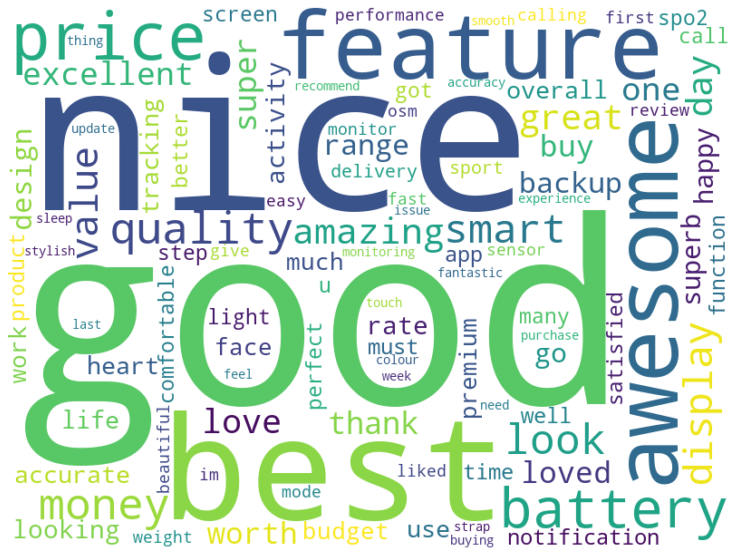

In [24]:
# Display word cloud of 5-star reviews
showWC(_5starReviews['Review'])

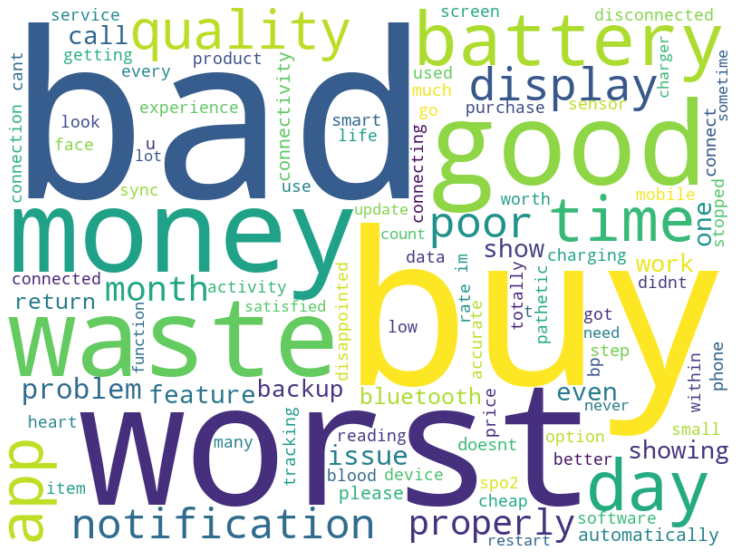

In [25]:
# Display word cloud of 1-star
showWC(_1starReviews['Review'])

# Product Features Extraction

In [27]:
# Get all reviews
reviews = df['Review']

In [28]:
# Apply data cleaning and pre-processing on the review texts
reviews = [sent.lower() for sent in reviews]
reviews = [remove_html_tags(sent) for sent in reviews]
reviews = [remove_punc(sent) for sent in reviews]
reviews = [remove_stopwords_1(sent) for sent in reviews]
reviews = [remove_emojis(sent) for sent in reviews]

In [29]:
# extract word tokens
tokens = [nltk.pos_tag(tkzn(lm(tkzn(sent)))) for sent in reviews] 

In [30]:
# POS Tagging
"""The noun phrases appearing most frequently in the 
reviews may be considered as potential product features"""

nouns = []
for token in tokens:
    for word,pos in token:
        if pos.startswith('NN'):
            nouns.append(word)

nouns.head(20)

In [42]:
nouns1 = []
for n in nouns:
    new = n.replace('backup','battery').replace('value','price').replace('money','price').replace('look','design').replace('notification', 'display').replace('strap','band')
    nouns1.append(new)

In [55]:
# Display the most frequently mentioned product features
d = dict(collections.Counter(nouns1))
d_sorted = sorted(d.items(), key =
             lambda kv:(kv[1], kv[0]), reverse=True)

xxx = pd.DataFrame(d_sorted)
xxx.columns = ['Feature', 'Frequency']
l=['battery', 'price' , 'display' , 'design' , 'band']
xx = xxx[xxx['Feature'].isin(l)]
xx['Frequency%'] = (xx['Frequency']*100)/xx['Frequency'].sum()
xx.reset_index(drop=True)

,Feature,Frequency,Frequency%
0,price,2935,39.856056
1,battery,1848,25.095057
2,display,1254,17.028789
3,design,1087,14.760999
4,band,240,3.259098
